In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


In [26]:
import plotly.graph_objects as go
import random
input_year = random.randint(1980,2014)
year = df['Year']
y = df['Automobile_Sales']
go.Figure().add_trace(go.Scatter(x=year, y=y, mode='lines', marker=dict(color='red')))

In [31]:
import plotly.express as px
import random
input_year = random.randint(1980,2014)
yearly_data = df[df['Year'] == input_year]
fig1 = px.line(yearly_data)
fig1

In [27]:
r = df.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
r

,Vehicle_Type,Automobile_Sales
0,Executivecar,2656.115714
1,Mediumfamilycar,2397.890602
2,Smallfamiliycar,2132.418033
3,Sports,2823.179787
4,Supperminicar,1746.359211


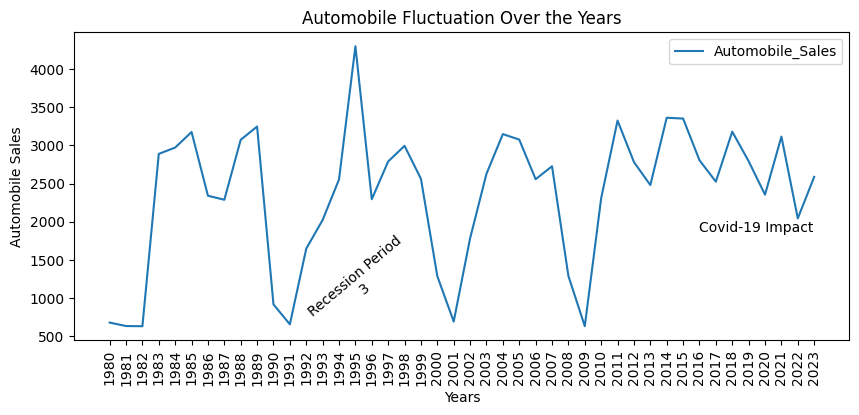

In [5]:
plt.figure(figsize=(10,4))
years = list(map(int, range(1980,2024)))
df1 = df.groupby('Year')['Automobile_Sales'].mean() 
df1.plot(x=df1.index, y=df1.values)
plt.title('Automobile Fluctuation Over the Years')
plt.xlabel('Years')
plt.ylabel('Automobile Sales')
plt.xticks(years, rotation=90)
plt.text(1992, 600, 'Recession Period \n            3', rotation=40)
plt.text(2016, 1870, 'Covid-19 Impact')
plt.legend()
plt.show()

---


In [6]:
df_vt = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_vt.set_index('Year', inplace=True)
df_vt = df_vt.groupby(['Vehicle_Type'])['Automobile_Sales']
df_vt.head()

Year
1980     2882.5
1980     2085.7
1980     3179.2
1981     1885.2
1981     3192.1
1981     2523.6
1982     5062.9
1982     2408.9
1982      102.0
1983     4120.2
1983    12845.6
1983     5030.6
1983     7998.7
1983     4677.1
1984     6261.6
1984    12299.7
1984     6175.8
1984     2514.0
1984     8415.9
1985    10892.0
1985     7068.4
1986     3163.0
1986     8740.0
1986     4178.5
1987     6676.0
Name: Automobile_Sales, dtype: float64

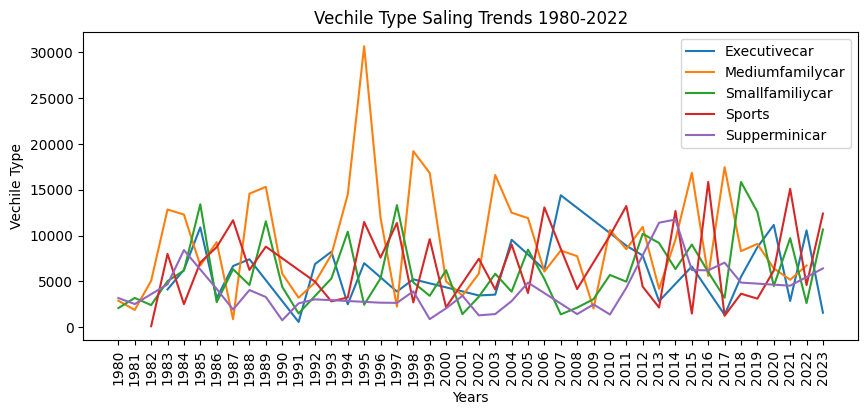

In [7]:
plt.figure(figsize=(10,4))
df_vt = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_vt.set_index('Year', inplace=True)
df_vt = df_vt.groupby(['Vehicle_Type'])['Automobile_Sales']
df_vt.plot(x=df_vt)
plt.xlabel('Years')
plt.ylabel('Vechile Type')
plt.title('Vechile Type Saling Trends 1980-2022')
plt.xticks(years, rotation=90)
plt.legend()
plt.show()

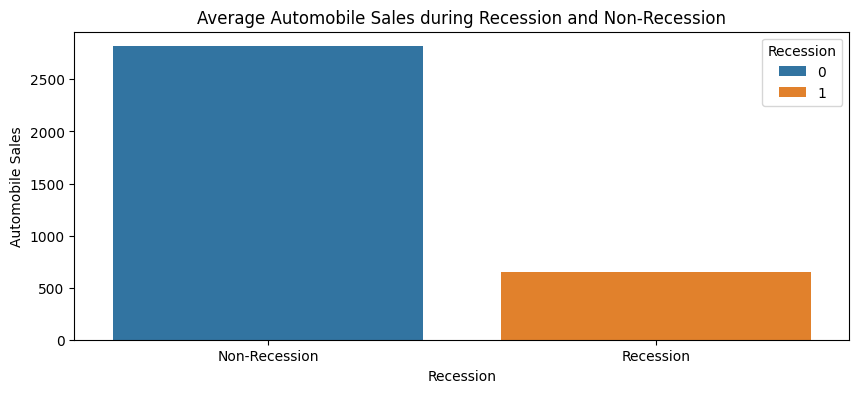

In [8]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

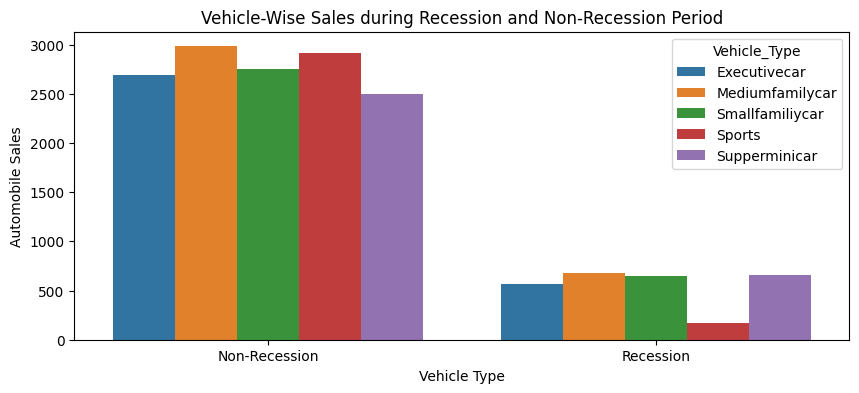

In [9]:
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Vehicle Type')
plt.ylabel('Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

In [10]:
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
dd

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222
5,1,Executivecar,564.000000
6,1,Mediumfamilycar,674.847619
7,1,Smallfamiliycar,650.733333
8,1,Sports,170.333333
9,1,Supperminicar,659.270968


---


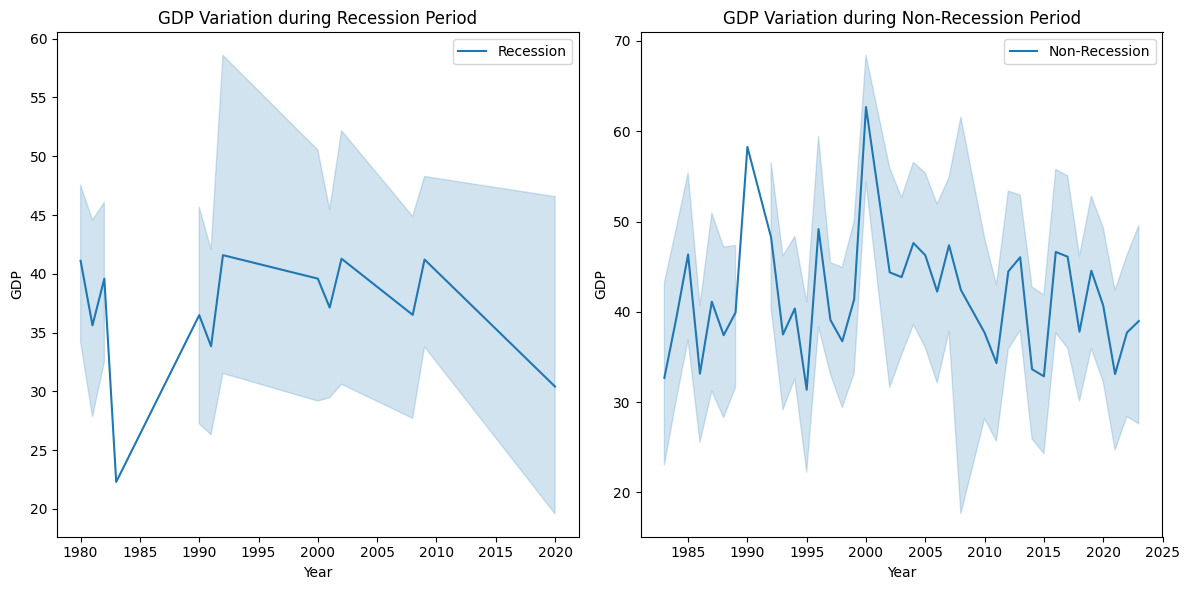

In [11]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
#Figure
fig=plt.figure(figsize=(12, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 
    
#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

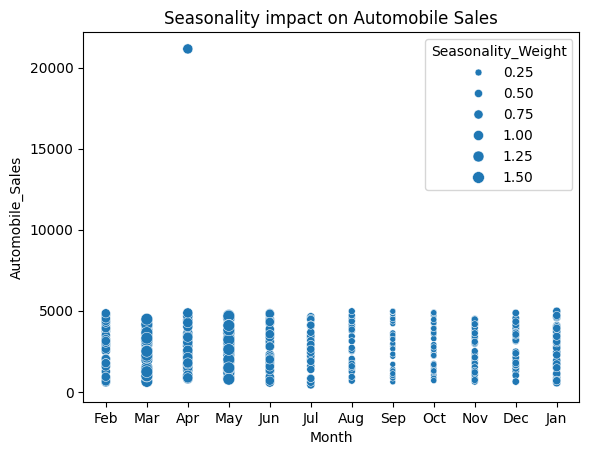

In [12]:
data = df[df['Recession'] == 0]
size = data['Seasonality_Weight']
sns.scatterplot(x='Month', y='Automobile_Sales', data=data, size=size)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

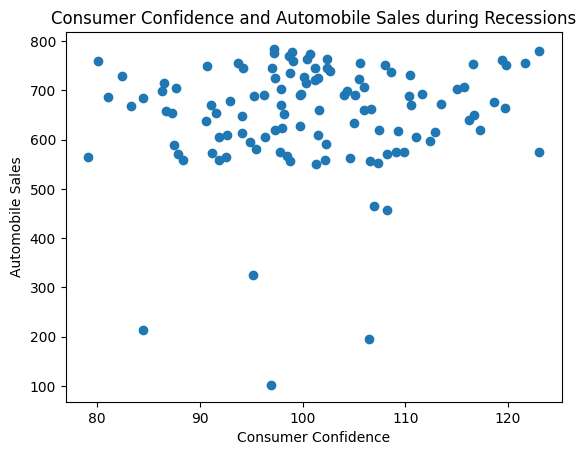

In [13]:
rec_data = df[df['Recession'] == 1]
plt.scatter(x=rec_data['Consumer_Confidence'], y=rec_data['Automobile_Sales'])
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.show()

Text(0.5, 1.0, 'Relationship between Average Vehicle Price and Sales during Recessions')

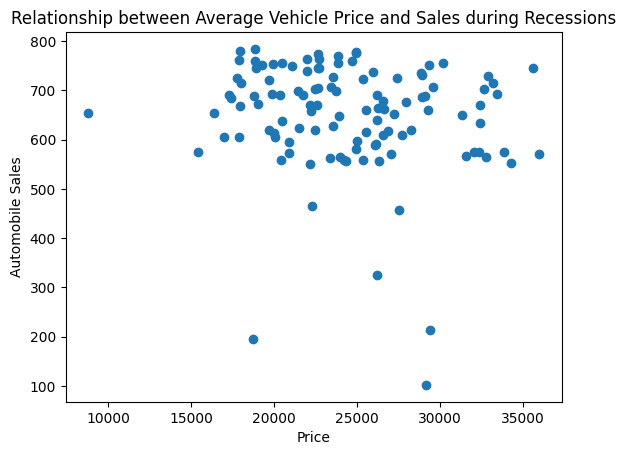

In [14]:
rec_data = df[df['Recession']==1]
plt.scatter(x='Price', y='Automobile_Sales', data=rec_data)
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

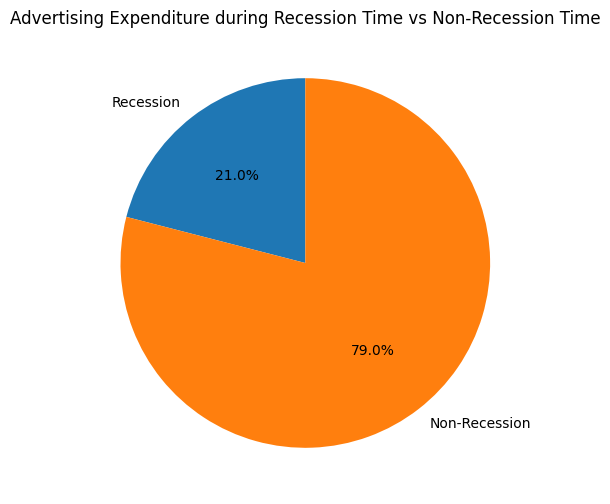

In [21]:
rdata = df[df['Recession'] == 1]
nrdata = df[df['Recession'] == 0]

rdatat = rdata['Advertising_Expenditure'].sum()
nrdatat = nrdata['Advertising_Expenditure'].sum()

sizes = [rdatat, nrdatat]
labels = ['Recession', 'Non-Recession']

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession Time vs Non-Recession Time')
plt.show()

In [24]:
re_data = df[df['Recession'] == 1]
re_data = re_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
re_data

Vehicle_Type
Executivecar         3243
Mediumfamilycar    130612
Smallfamiliycar    102759
Sports              12568
Supperminicar       90728
Name: Advertising_Expenditure, dtype: int64

In [44]:
import plotly.express as px
from dash import dcc
recession_data = df[df['Recession'] == 1]
unemp_rec = u_data = df.groupby(['unemployment_rate','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
R_chart4 = px.bar(x='unemployment_rate',y='Automobile_Sales',
                                            title='Effect of Unemployment Rate on Sales', 
                                            data_frame=unemp_rec)
R_chart4

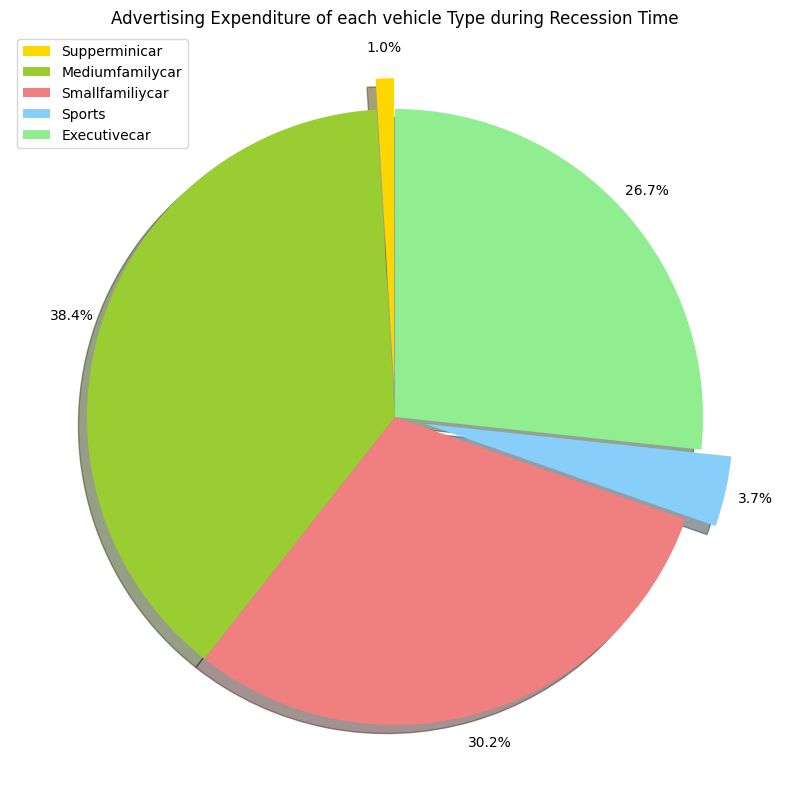

In [4]:
re_data = df[df['Recession'] == 1]
re_data = re_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
labels = ['Supperminicar', 'Mediumfamilycar', 'Smallfamiliycar', 'Sports', 'Executivecar']
sizes = re_data.values
plt.figure(figsize=(14,10))
plt.pie(sizes, 
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=1.1, 
        explode=[0.1,0,0,0.1,0], 
        colors=colors,
        shadow=True)

plt.legend(labels=labels, loc='upper left')
plt.title('Advertising Expenditure of each vehicle Type during Recession Time')
plt.show()

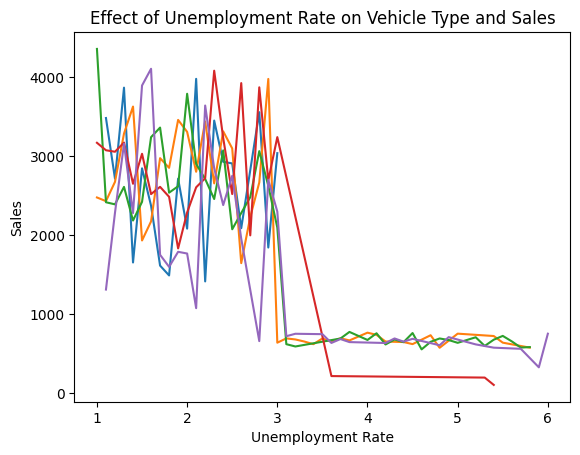

In [10]:
u_data = df.groupby(['unemployment_rate','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
u_data.set_index('unemployment_rate', inplace=True)
u_data = u_data.groupby('Vehicle_Type')['Automobile_Sales']
u_data.plot(x=u_data)

plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Sales')
plt.show()

C:\Users\Abdulrhman Alsir\AppData\Local\Temp\ipykernel_12532\1181213838.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


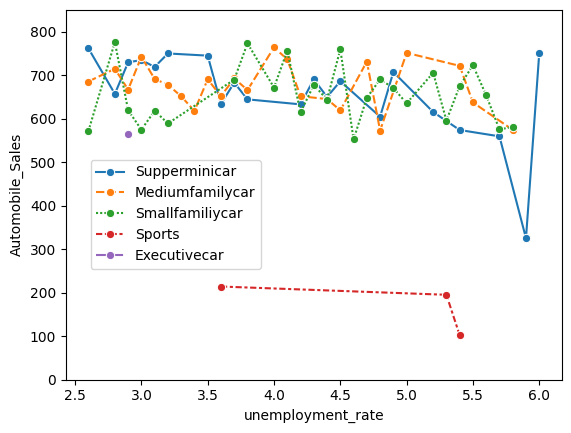

In [11]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"